# Playing with Sunspotter Dataset
Following code is the immitation of example in [database](https://github.com/sunspotter/database/blob/master/example_analysis.py) repository.
## Reading data set

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
images = pd.read_csv("all_clear_dataset/lookup_properties.csv", sep=';')
fitsfiles = pd.read_csv("all_clear_dataset/lookup_timesfits.csv", sep=';')
classification = pd.read_csv("all_clear_dataset/classifications.csv", sep=';')
zoorank = pd.read_csv("all_clear_dataset/rankings.csv", sep=';')

## From the same dataframe

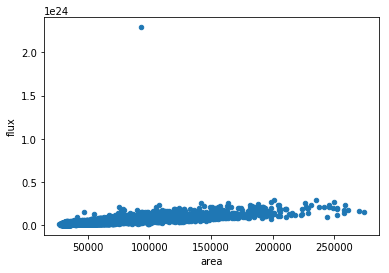

In [26]:
images.plot(x='area', y='flux', kind='scatter')

## Joining images with rank

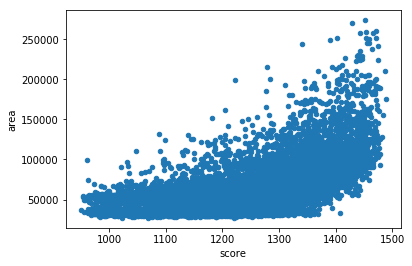

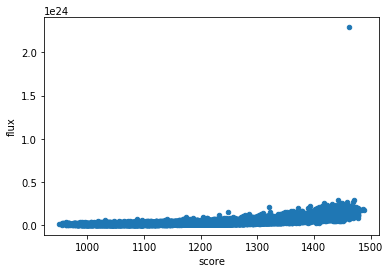

In [29]:
df = pd.merge(zoorank, images, how='inner', left_on='image_id', right_on='id')
df.plot(x='score', y='area', kind='scatter')
df.plot(x='score', y='flux', kind='scatter')

## Joining images, rank and fitsfiles (dates)

In [32]:
df1.columns

Index(['id_x', 'filename_x', 'zooniverse_id', 'angle', 'area', 'areafrac',
       'areathesh', 'bipolesep', 'c1flr24hr', 'id_filename', 'flux',
       'fluxfrac', 'hale', 'hcpos_x', 'hcpos_y', 'm1flr12hr', 'm5flr12hr',
       'n_nar', 'noaa', 'pxpos_x', 'pxpos_y', 'sszn', 'zurich', 'id_y',
       'filename_y', 'obs_date'],
      dtype='object')

## Joining images, rank and fitsfiles (dates)

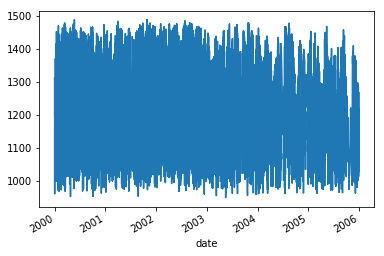

In [37]:
df1 = pd.merge(images, fitsfiles, how='inner', left_on='id_filename', right_on='id')
df = pd.merge(zoorank, df1, how='inner', left_on='image_id', right_on='id_x')
df['date'] = pd.to_datetime(df['obs_date'])
df.set_index('date', inplace=True)
df['score'].plot()

32